In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

_max_year_range = 2024
_min_year_range = 1900

# Read in the CSV files
department_df = pd.read_csv('Department_Information.csv')
employee_df = pd.read_csv('Employee_Information.csv')
counseling_df = pd.read_csv('Student_Counceling_Information.csv')
performance_df = pd.read_csv('Student_Performance_Data.csv')

print("Department Information:")
print(department_df.head())

print("\nEmployee Information:")
print(employee_df.head())

print("\nStudent Counseling Information:")
print(counseling_df.head())

print("\nStudent Performance Data:")
print(performance_df.head())



Department Information:
  Department_ID                 Department_Name         DOE
0     IDEPT4670           Aerospace Engineering   5/31/1961
1     IDEPT5528  Biosciences and Bioengineering   6/28/1943
2     IDEPT3115            Chemical Engineering    5/1/1940
3     IDEPT5881                       Chemistry    6/8/2013
4     IDEPT4938               Civil Engineering  10/27/1941

Employee Information:
  Employee ID         DOB         DOJ Department_ID
0    IU196557   2/23/1983  10/31/2009     IDEPT4938
1    IU449901    9/2/1985    6/7/2009     IDEPT2357
2    IU206427   7/30/1971    5/9/2008     IDEPT4670
3    IU688905   7/20/1973   1/17/2002     IDEPT2601
4    IU634582  11/16/1991   2/13/2000     IDEPT7626

Student Counseling Information:
    Student_ID       DOA        DOB Department_Choices Department_Admission
0  SID20131143  7/1/2013   2/5/1996          IDEPT7783            IDEPT7783
1  SID20131151  7/1/2013  7/31/1995          IDEPT6347            IDEPT6347
2  SID20131171  7/1/

In [258]:
performance_df.describe(include='all')

,Student_ID,Semster_Name,Paper_ID,Paper_Name,Marks,Effort_Hours
count,209610,209610,209610,209609,209608.000000,209609.000000
unique,3819,8,56,7,NaN,NaN
top,SID20161237,Sem_7,SEMI0071868,Paper 6,NaN,NaN
freq,56,26236,3761,29975,NaN,NaN
mean,NaN,NaN,NaN,NaN,69.593546,8.085216
std,NaN,NaN,NaN,NaN,18.220346,2.797997
min,NaN,NaN,NaN,NaN,-100.000000,-3.000000
25%,NaN,NaN,NaN,NaN,54.000000,6.000000
50%,NaN,NaN,NaN,NaN,70.000000,7.000000
75%,NaN,NaN,NaN,NaN,85.000000,10.000000


In [259]:
print("\nList of invalid 'Marks' (Mark < 0 OR Mark > 100) in 'Student Performance Data':")
invalid_marks_df = performance_df[(performance_df['Marks'] < 0) | (performance_df['Marks'] > 100)]
print(invalid_marks_df)


List of invalid 'Marks' (Mark < 0 OR Mark > 100) in 'Student Performance Data':
         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
328     SID20131189        Sem_1  SEMI0015910    Paper 4  -49.0           0.0
414     SID20131191        Sem_5  SEMI0055015    Paper 6  207.0          14.0
551     SID20131231        Sem_1  SEMI0016208    Paper 5 -100.0          14.0
840     SID20131303        Sem_3  SEMI0031818    Paper 4  140.0          14.0
181488  SID20182774        Sem_8  SEMI0086600    Paper 6  999.0           5.0


In [260]:
''' Alternate DeMorgan Theorem Logic (Because why not) '''
'''
print("\nList of valid 'Marks' (Mark >= 0 AND Mark <= 100) in 'Student Performance Data':")
invalid_marks_df != performance_df[(performance_df['Marks'] < 0) | (performance_df['Marks'] > 100)]
print(invalid_marks_df)
'''

difference = (performance_df['Marks'].count() - invalid_marks_df['Marks'].count())
print("\nList of valid 'Marks' (Mark >= 0 AND Mark <= 100) in 'Student Performance Data':")
print(f"\n*** Total Dataframe size should be {difference} rows ***\n")
valid_marks_df = performance_df[(performance_df['Marks'] >= 0) & (performance_df['Marks'] <= 100)]
print(valid_marks_df)


List of valid 'Marks' (Mark >= 0 AND Mark <= 100) in 'Student Performance Data':

*** Total Dataframe size should be 209603 rows ***

         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0       SID20131143        Sem_1  SEMI0012995    Paper 1   44.0           5.0
1       SID20131143        Sem_1  SEMI0015183    Paper 2   74.0           8.0
2       SID20131143        Sem_1  SEMI0018371    Paper 3   80.0           8.0
3       SID20131143        Sem_1  SEMI0015910    Paper 4   44.0           5.0
4       SID20131143        Sem_1  SEMI0016208    Paper 5   95.0          12.0
...             ...          ...          ...        ...    ...           ...
209605  SID20189989        Sem_8  SEMI0082598    Paper 3   94.0          12.0
209606  SID20189989        Sem_8  SEMI0088030    Paper 4   49.0           5.0
209607  SID20189989        Sem_8  SEMI0081794    Paper 5   47.0         257.0
209608  SID20189989        Sem_8  SEMI0086600    Paper 6   87.0          11.0
209609 

In [261]:
print("\nList of invalid 'Effort_Hours' ('Effort_Hours' < 0) in 'Student Performance Data':")
invalid_effort_df = performance_df[(performance_df['Effort_Hours'] < 0)]
print(invalid_effort_df)


List of invalid 'Effort_Hours' ('Effort_Hours' < 0) in 'Student Performance Data':
        Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
59635  SID20147406        Sem_6  SEMI0067259    Paper 2   78.0          -3.0


In [262]:
difference = (performance_df['Effort_Hours'].count() - invalid_effort_df['Effort_Hours'].count())
print("\nList of valid 'Effort_Hours' ('Effort_Hours' >= 0) in 'Student Performance Data':")
print(f"\n*** Total Dataframe size should be {difference} rows ***\n")
valid_effort_df = performance_df[(performance_df['Effort_Hours'] >= 0)]
print(valid_effort_df)


List of valid 'Effort_Hours' ('Effort_Hours' >= 0) in 'Student Performance Data':

*** Total Dataframe size should be 209608 rows ***

         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0       SID20131143        Sem_1  SEMI0012995    Paper 1   44.0           5.0
1       SID20131143        Sem_1  SEMI0015183    Paper 2   74.0           8.0
2       SID20131143        Sem_1  SEMI0018371    Paper 3   80.0           8.0
3       SID20131143        Sem_1  SEMI0015910    Paper 4   44.0           5.0
4       SID20131143        Sem_1  SEMI0016208    Paper 5   95.0          12.0
...             ...          ...          ...        ...    ...           ...
209605  SID20189989        Sem_8  SEMI0082598    Paper 3   94.0          12.0
209606  SID20189989        Sem_8  SEMI0088030    Paper 4   49.0           5.0
209607  SID20189989        Sem_8  SEMI0081794    Paper 5   47.0         257.0
209608  SID20189989        Sem_8  SEMI0086600    Paper 6   87.0          11.0
209609

In [264]:
null_mask = performance_df.isnull().any(axis=1)
print("\nCount of missing values before drop in 'Student Performance Data':")
print(performance_df.isnull().sum())
print("\nRemoved values are:")
print(performance_df[null_mask])
performance_df.dropna(how='any', inplace=True)
print("\nCount of missing values after drop in 'Student Performance Data':")
print(performance_df.isnull().sum())

cleaned_performance_df = pd.merge(valid_marks_df, valid_effort_df, on='Student_ID', how='left')
print(cleaned_performance_df)



Count of missing values before drop in 'Student Performance Data':
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      0
Marks           0
Effort_Hours    0
dtype: int64

Removed values are:
Empty DataFrame
Columns: [Student_ID, Semster_Name, Paper_ID, Paper_Name, Marks, Effort_Hours]
Index: []

Count of missing values after drop in 'Student Performance Data':
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      0
Marks           0
Effort_Hours    0
dtype: int64
           Student_ID Semster_Name_x   Paper_ID_x Paper_Name_x  Marks_x  \
0         SID20131143          Sem_1  SEMI0012995      Paper 1     44.0   
1         SID20131143          Sem_1  SEMI0012995      Paper 1     44.0   
2         SID20131143          Sem_1  SEMI0012995      Paper 1     44.0   
3         SID20131143          Sem_1  SEMI0012995      Paper 1     44.0   
4         SID20131143          Sem_1  SEMI0012995      Paper 1     44.0   
...               ...            ...          .

<Axes: title={'center': 'blah'}, xlabel='Effort_Hours', ylabel='Marks'>

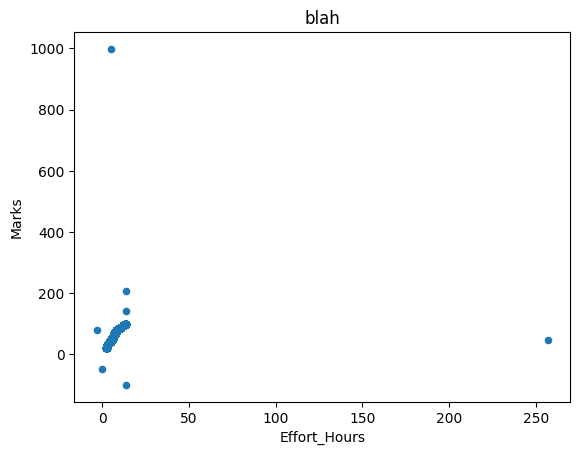

In [ ]:
performance_df.plot.scatter(x='Effort_Hours', y='Marks', title='blah')